In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.nasnet import NASNetLarge, NASNetMobile
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
WH = 331
IMAGE_SIZE = (WH, WH)
INPUT_SHAPE = IMAGE_SIZE + (3,)
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32

In [4]:
gdrive_dir = "/content/drive/MyDrive"
working_dir = os.path.join(gdrive_dir, "CS3244 Project")
data_dir = os.path.join(working_dir, "landmarks/international/data_split/7")
model_root_dir = os.path.join(working_dir, "models/xihao")

In [42]:
num_of_labels = len(os.listdir(data_dir))

print('number of local labels:', num_of_labels)

number of local labels: 200


In [71]:
# dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, interpolation="bilinear")

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, 
    validation_split = VALIDATION_SPLIT,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    brightness_range = [0.9,1.1],
    fill_mode = 'nearest'
)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    subset = "training", 
    shuffle = True, 
    target_size = IMAGE_SIZE ,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = VALIDATION_SPLIT
)
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    subset = "validation", 
    shuffle = False, 
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1737 images belonging to 200 classes.
Found 345 images belonging to 200 classes.


In [72]:
input_layer = layers.InputLayer(
  input_shape = INPUT_SHAPE,
  batch_size = BATCH_SIZE,
  name = 'input'
)

In [73]:
model = tf.keras.Sequential(input_layer)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.add(
  hub.KerasLayer("https://tfhub.dev/google/imagenet/nasnet_large/classification/4",
                  trainable = True)
)

ValueError: ignored

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
# model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_of_labels, activation='softmax'))

In [77]:
build_arg = (None,) + INPUT_SHAPE
model.build(build_arg)

In [78]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
    metrics = ['accuracy']
)

In [79]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [68]:
steps_per_epoch = int(train_generator.samples / BATCH_SIZE)
validation_steps = int(validation_generator.samples / BATCH_SIZE)

print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)

Steps per epoch: 54
Validation steps: 10


In [69]:
history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 60,
    validation_data = validation_generator,
    # validation_steps = validation_steps
)


Epoch 1/60


ResourceExhaustedError: ignored

In [ ]:
save_model_name = "imagenet_nasnet_large_classification_1"
save_model_dir = os.path.join(model_root_dir, save_model_name)
tf.keras.models.save_model(model)

Text(0.5, 1.0, 'Training and validation loss')

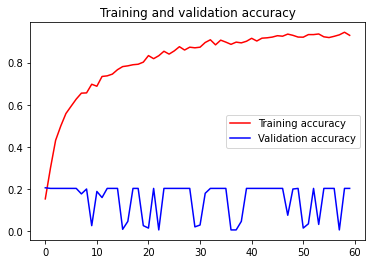

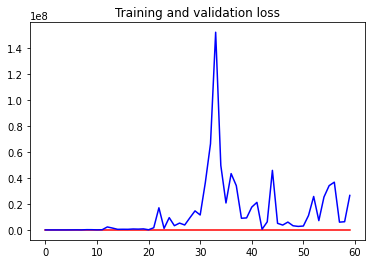

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')